In [1]:
from google.colab import files

uploaded = files.upload()


Saving finance_economics_dataset.csv to finance_economics_dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv('/content/finance_economics_dataset.csv')
df.head()


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [3]:
#1. What is the shape of the dataset?
print("Shape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (3000, 24)


In [4]:
#2. What are the column names and their data types?
print("Column Names and Data Types")
print(df.dtypes)

print("\nDetailed Info:")
df.info()


Column Names and Data Types
Date                                      object
Stock Index                               object
Open Price                               float64
Close Price                              float64
Daily High                               float64
Daily Low                                float64
Trading Volume                             int64
GDP Growth (%)                           float64
Inflation Rate (%)                       float64
Unemployment Rate (%)                    float64
Interest Rate (%)                        float64
Consumer Confidence Index                  int64
Government Debt (Billion USD)              int64
Corporate Profits (Billion USD)            int64
Forex USD/EUR                            float64
Forex USD/JPY                            float64
Crude Oil Price (USD per Barrel)         float64
Gold Price (USD per Ounce)               float64
Real Estate Index                        float64
Retail Sales (Billion USD)               

In [7]:
#3. How many unique stock indices are there?
df['Stock Index'].nunique()


3

In [8]:
#4. What is the date range of the dataset?
print("Date range:", df['Date'].min(), "to", df['Date'].max())


Date range: 2000-01-01 to 2008-03-18


In [9]:
#5. Are there any missing values?
df.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


In [12]:
#6.Are there negative values in columns that should be non-negative?
non_negative_cols = ['Open Price', 'Close Price', 'Daily High', 'Daily Low',
                     'Trading Volume', 'Gold Price (USD per Ounce)',
                     'Crude Oil Price (USD per Barrel)',
                     'Corporate Profits (Billion USD)',
                     'Government Debt (Billion USD)',
                     'Real Estate Index', 'Retail Sales (Billion USD)',
                     'Venture Capital Funding (Billion USD)',
                     'Consumer Spending (Billion USD)']

(df[non_negative_cols] < 0).sum()

,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
Gold Price (USD per Ounce),0
Crude Oil Price (USD per Barrel),0
Corporate Profits (Billion USD),0
Government Debt (Billion USD),0
Real Estate Index,0


In [13]:
#7 .What is the summary of GDP Growth (%)?
df['GDP Growth (%)'].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


In [14]:
#8. Are there rows with zero or near-zero trading volume?
print((df['Trading Volume'] <= 0).sum())

0


In [18]:
#9. Are there any duplicate rows?
print(df.duplicated().sum())

0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

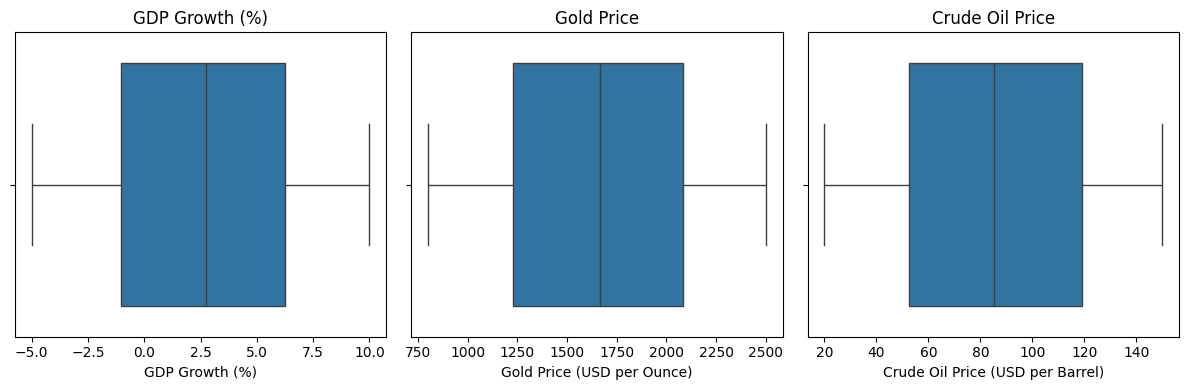

In [20]:
#10. Are there outliers in GDP, Gold, or Oil prices?

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['GDP Growth (%)'])
plt.title('GDP Growth (%)')

plt.subplot(1,3,2)
sns.boxplot(x=df['Gold Price (USD per Ounce)'])
plt.title('Gold Price')

plt.subplot(1,3,3)
sns.boxplot(x=df['Crude Oil Price (USD per Barrel)'])
plt.title('Crude Oil Price')

plt.tight_layout()
plt.show()

In [22]:
#11. What is the summary of Inflation Rate (%)?
df['Inflation Rate (%)'].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


In [23]:
#12. What is the average unemployment rate?
print(df['Unemployment Rate (%)'].mean())

8.663786666666667


In [24]:
#13. Which index has the highest trading volume?
print(df.groupby('Stock Index')['Trading Volume'].mean().sort_values(ascending=False).head(1))

Stock Index
S&P 500    5.145193e+08
Name: Trading Volume, dtype: float64


In [26]:
#14. How many stock records are from each index?
df['Stock Index'].value_counts()


,count
Stock Index,
S&P 500,1036
NASDAQ,1007
Dow Jones,957


In [27]:
#15. What is the correlation between inflation and interest rate?
print(df['Inflation Rate (%)'].corr(df['Interest Rate (%)']))


0.00573292723557624


In [28]:
#16. What is the average Consumer Confidence Index?
print(df['Consumer Confidence Index'].mean())


85.036


In [30]:
#17. Which column has the highest standard deviation?
print(df.std(numeric_only=True).sort_values(ascending=False).head(1))

Trading Volume    2.859004e+08
dtype: float64


In [32]:
#18. What is the highest gold price recorded?
print(df['Gold Price (USD per Ounce)'].max())

2499.66


In [33]:
#19. Which date had the highest crude oil price?
print(df.loc[df['Crude Oil Price (USD per Barrel)'].idxmax(), 'Date'])


2001-11-22


In [34]:
#20. What is the average corporate profit?
print(df['Corporate Profits (Billion USD)'].mean())

2553.7563333333333
